# Анализ системы метрик приложения Procrastinate Pro+

Приложение Procrastinate Pro+ предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

Есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных



In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем таблицы и сохраняем их в переменные
users_df=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
purchase_df=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
costs_df=pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

In [3]:
# Выведем первые строки таблиц на экран и изучим данные
display(users_df.head())
display(purchase_df.head())
display(costs_df.head())

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [4]:
# Выведем на экран общую информацию о таблицах и проверим целостность данных
display(users_df.info())
display(purchase_df.info())
display(costs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


None

##### Данные совпадают с описанием. Пропусков в данных нет. Столбцы с информацией о датах имеют строковый тип. Нужно привести к формату даты.

In [5]:
# Приведем столбцы с датами к типу datetime
users_df['session_start']=pd.to_datetime(users_df['session_start'])
users_df['session_end']=pd.to_datetime(users_df['session_end'])
purchase_df['event_dt']=pd.to_datetime(purchase_df['event_dt'])
costs_df['dt']=pd.to_datetime(costs_df['dt'])


In [6]:
# Проверим сохранение изменений
display(users_df.info())
display(purchase_df.info())
display(costs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


None

##### Типы данных скорректированы

In [7]:
# Проверим наличие полных дубликатов в таблицах
print(users_df.duplicated().sum())
print(purchase_df.duplicated().sum())
print(costs_df.duplicated().sum())

0
0
0


##### Полных дубликатов в таблицах нет

### Для последующего анализа было загружено и обработано 3 таблицы с информацией о пользователях, их активности, покупках и маркетинговых затратах компании. Данные соответствуют описанию. Пропусков и полных дубликатов в данных не обнаружено. Столбцы с датами были приведены к нужному для последующего анализа типу данных datetime.

## Подготовка данных к когортному анализу


In [8]:
# Найдём дату привлечения  и канал привлечения  для каждого пользователя
users_df=users_df.sort_values(by=['user_id','session_start'])
profiles =users_df.groupby('user_id').agg({'session_start': 'min','channel': 'first' }).reset_index()
profiles.head()

,user_id,session_start,channel
0,26034876,2024-05-29 10:24:00,FaceBoom
1,69890364,2024-06-28 05:48:00,RocketSuperAds
2,75610104,2024-06-09 06:48:00,FaceBoom
3,76692397,2024-10-21 01:51:00,FaceBoom
4,80224421,2024-06-21 11:47:00,FaceBoom


In [9]:
# Переименуем столбцы channel и session_start в first_channel и first_dt соответственно
profiles=profiles.rename(columns={'channel': 'first_channel',
    'session_start': 'first_dt'})

In [10]:
# Оставляем только дату в столбце first_dt и добавляем столбец с месяцем
profiles['first_dt']=pd.to_datetime(profiles['first_dt'])
profiles['first_month']=profiles['first_dt'].dt.to_period('M').dt.start_time
profiles['first_dt']=profiles['first_dt'].dt.date
profiles.head()

,user_id,first_dt,first_channel,first_month
0,26034876,2024-05-29,FaceBoom,2024-05-01
1,69890364,2024-06-28,RocketSuperAds,2024-06-01
2,75610104,2024-06-09,FaceBoom,2024-06-01
3,76692397,2024-10-21,FaceBoom,2024-10-01
4,80224421,2024-06-21,FaceBoom,2024-06-01


In [11]:
# Агрегируем затраты по каналам и дням
costs_df = costs_df.groupby(['dt', 'channel'])['costs'].sum().reset_index()

In [12]:
# Считаем количество уникальных клиентов для каждой пары (first_channel, first_dt)
client_counts = profiles.groupby(['first_channel', 'first_dt'])['user_id'].nunique().reset_index()

In [13]:
# Объединяем с затратами на маркетинг
costs_df['dt']=costs_df['dt'].dt.date
cac_data = costs_df.merge(client_counts, left_on=['dt', 'channel'], right_on=['first_dt', 'first_channel'],how='left')
cac_data.head()

,dt,channel,costs,first_channel,first_dt,user_id
0,2024-04-01,FaceBoom,124.938874,FaceBoom,2024-04-01,133
1,2024-04-01,MediaTornado,19.932806,MediaTornado,2024-04-01,80
2,2024-04-01,RocketSuperAds,62.050000,RocketSuperAds,2024-04-01,70
3,2024-04-01,TipTop,54.200101,TipTop,2024-04-01,73
4,2024-04-02,FaceBoom,88.147779,FaceBoom,2024-04-02,94


In [14]:
# Рассчитываем CAC (бюджет / количество клиентов)
cac_data['CAC'] = cac_data['costs'] / cac_data['user_id']
cac_data.head()

,dt,channel,costs,first_channel,first_dt,user_id,CAC
0,2024-04-01,FaceBoom,124.938874,FaceBoom,2024-04-01,133,0.939390
1,2024-04-01,MediaTornado,19.932806,MediaTornado,2024-04-01,80,0.249160
2,2024-04-01,RocketSuperAds,62.050000,RocketSuperAds,2024-04-01,70,0.886429
3,2024-04-01,TipTop,54.200101,TipTop,2024-04-01,73,0.742467
4,2024-04-02,FaceBoom,88.147779,FaceBoom,2024-04-02,94,0.937742


In [15]:
# Присоединяем значение CAC по дате и каналу к таблице first_sessions
profiles=profiles.merge(cac_data[['first_dt', 'first_channel', 'CAC']], on=['first_dt', 'first_channel'], how='left')
display(profiles.head())
profiles.info()

,user_id,first_dt,first_channel,first_month,CAC
0,26034876,2024-05-29,FaceBoom,2024-05-01,0.953250
1,69890364,2024-06-28,RocketSuperAds,2024-06-01,0.604917
2,75610104,2024-06-09,FaceBoom,2024-06-01,1.196159
3,76692397,2024-10-21,FaceBoom,2024-10-01,1.147967
4,80224421,2024-06-21,FaceBoom,2024-06-01,1.208981


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74856 entries, 0 to 74855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        74856 non-null  int64         
 1   first_dt       74856 non-null  object        
 2   first_channel  74856 non-null  object        
 3   first_month    74856 non-null  datetime64[ns]
 4   CAC            74856 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [16]:
# Присоединяем к первоначальной таблице users_df с информацией о событиях таблицу first_sessions c информацией о дате привлечения и канале привлечения  пользователя
visits_df=users_df.merge(profiles[['user_id', 'first_dt', 'first_channel','first_month']],on='user_id',how='left')
visits_df.head()

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,first_month
0,26034876,India,tv,FaceBoom,2024-05-29 10:24:00,2024-05-29 10:51:00,2024-05-29,FaceBoom,2024-05-01
1,69890364,India,mobile,RocketSuperAds,2024-06-28 05:48:00,2024-06-28 07:30:00,2024-06-28,RocketSuperAds,2024-06-01
2,75610104,India,mobile,FaceBoom,2024-06-09 06:48:00,2024-06-09 07:00:00,2024-06-09,FaceBoom,2024-06-01
3,76692397,India,mobile,FaceBoom,2024-10-21 01:51:00,2024-10-21 01:59:00,2024-10-21,FaceBoom,2024-10-01
4,80224421,India,mobile,FaceBoom,2024-06-21 11:47:00,2024-06-21 12:17:00,2024-06-21,FaceBoom,2024-06-01


In [17]:
# Найдём лайфтайм для каждого события
visits_df['session_start']=pd.to_datetime(visits_df['session_start'])
visits_df['session_start']=visits_df['session_start'].dt.date
visits_df['session_end']=pd.to_datetime(visits_df['session_end'])
visits_df['session_end']=visits_df['session_end'].dt.date
visits_df['lifetime']=visits_df['session_start']-visits_df['first_dt']
visits_df['lifetime']=visits_df['lifetime'].dt.days
display(visits_df.head())
visits_df.info()

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,first_month,lifetime
0,26034876,India,tv,FaceBoom,2024-05-29,2024-05-29,2024-05-29,FaceBoom,2024-05-01,0
1,69890364,India,mobile,RocketSuperAds,2024-06-28,2024-06-28,2024-06-28,RocketSuperAds,2024-06-01,0
2,75610104,India,mobile,FaceBoom,2024-06-09,2024-06-09,2024-06-09,FaceBoom,2024-06-01,0
3,76692397,India,mobile,FaceBoom,2024-10-21,2024-10-21,2024-10-21,FaceBoom,2024-10-01,0
4,80224421,India,mobile,FaceBoom,2024-06-21,2024-06-21,2024-06-21,FaceBoom,2024-06-01,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 161865 entries, 0 to 161864
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  object        
 5   session_end    161865 non-null  object        
 6   first_dt       161865 non-null  object        
 7   first_channel  161865 non-null  object        
 8   first_month    161865 non-null  datetime64[ns]
 9   lifetime       161865 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 13.6+ MB


In [18]:
# Присоединяем к первоначальной таблице purchase_df с информацией о покупках таблицу first_sessions c информацией о дате привлечения и канале привлечения пользователя
orders_df=purchase_df.merge(profiles[['user_id', 'first_dt', 'first_channel']],on='user_id',how='right')
display(orders_df.head())
orders_df.info()

,user_id,event_dt,revenue,first_dt,first_channel
0,26034876,NaT,NaN,2024-05-29,FaceBoom
1,69890364,NaT,NaN,2024-06-28,RocketSuperAds
2,75610104,NaT,NaN,2024-06-09,FaceBoom
3,76692397,NaT,NaN,2024-10-21,FaceBoom
4,80224421,2024-06-22 15:40:49,2.99,2024-06-21,FaceBoom


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101860 entries, 0 to 101859
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        101860 non-null  int64         
 1   event_dt       33893 non-null   datetime64[ns]
 2   revenue        33893 non-null   float64       
 3   first_dt       101860 non-null  object        
 4   first_channel  101860 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.7+ MB


In [19]:
# Найдём лайфтайм для каждого события покупки
orders_df['event_dt']=pd.to_datetime(orders_df['event_dt'])
orders_df['event_dt']=orders_df['event_dt'].dt.date
orders_df['lifetime']=orders_df['event_dt']-orders_df['first_dt']
orders_df['lifetime']=orders_df['lifetime'].dt.days
display(orders_df.head())
orders_df.info()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime
0,26034876,NaT,NaN,2024-05-29,FaceBoom,NaN
1,69890364,NaT,NaN,2024-06-28,RocketSuperAds,NaN
2,75610104,NaT,NaN,2024-06-09,FaceBoom,NaN
3,76692397,NaT,NaN,2024-10-21,FaceBoom,NaN
4,80224421,2024-06-22,2.99,2024-06-21,FaceBoom,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101860 entries, 0 to 101859
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        101860 non-null  int64  
 1   event_dt       33893 non-null   object 
 2   revenue        33893 non-null   float64
 3   first_dt       101860 non-null  object 
 4   first_channel  101860 non-null  object 
 5   lifetime       33893 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.4+ MB


In [20]:
# Заполним пропуски в столбцах со стоимостью покупок и лайфтайм
orders_df['revenue']=orders_df['revenue'].fillna(0)
orders_df['lifetime']=orders_df['lifetime'].fillna(0)

In [21]:
# Отфильтруем по лайфтайм 28 дней
orders_28_df=orders_df[orders_df['lifetime']<28].copy()
orders_28_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89391 entries, 0 to 101859
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        89391 non-null  int64  
 1   event_dt       21424 non-null  object 
 2   revenue        89391 non-null  float64
 3   first_dt       89391 non-null  object 
 4   first_channel  89391 non-null  object 
 5   lifetime       89391 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ MB


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начнём анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитаем по всем данным значения DAU, MAU и Stickiness и визуализируем их. Активными считаем всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитаем:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитываем всех привлечённых пользователей когорты.


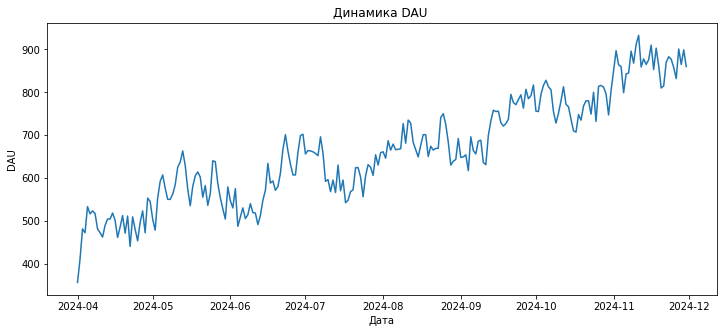

In [22]:
# Рассчитаем и визуализируем значение DAU по всем данным
dau=visits_df.groupby('session_start')['user_id'].nunique().reset_index()

plt.figure(figsize=(12,5))
plt.plot(dau['session_start'],dau['user_id'])
plt.title('Динамика DAU ')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.show()

##### Метрика DAU демонстрирует положительную динамику на протяжении всего периода

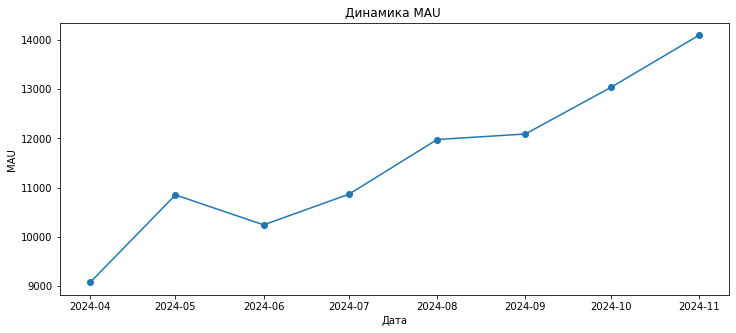

In [23]:
# Рассчитаем и визуализируем значение MAU по всем данным
visits_df['session_start']=pd.to_datetime(visits_df['session_start'])
visits_df['month']=visits_df['session_start'].dt.to_period('M').dt.to_timestamp()
visits_df['session_start']=visits_df['session_start'].dt.date
mau=visits_df.groupby('month')['user_id'].nunique().reset_index()

plt.figure(figsize=(12,5))
plt.plot(mau['month'],mau['user_id'],marker='o')
plt.title('Динамика MAU ')
plt.xlabel('Дата')
plt.ylabel('MAU')
plt.show()

##### Метрика MAU  демонстрирует положительную динамику в течении всего периода

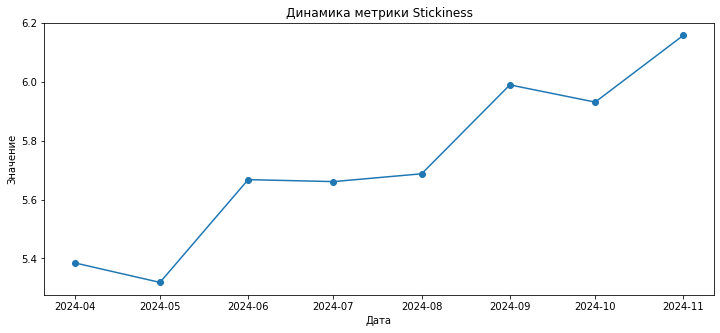

In [24]:
# Рассчитаем и визуализируем динамику метрики вовлечённости Stickiness
dau['session_start']=pd.to_datetime(dau['session_start'])
dau['month'] = dau['session_start'].dt.to_period('M').dt.to_timestamp()
dau_monthly_average = dau.groupby('month')['user_id'].mean().reset_index()
stickiness_table = mau.merge(dau_monthly_average, on='month', how='inner')
stickiness_table['stick'] =100*(stickiness_table['user_id_y']/stickiness_table['user_id_x'])

plt.figure(figsize=(12,5))
plt.plot(stickiness_table['month'],stickiness_table['stick'],marker='o')
plt.title('Динамика метрики Stickiness')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

##### Метрика Stickiness также  показывает положительную динамику в течении всего периода

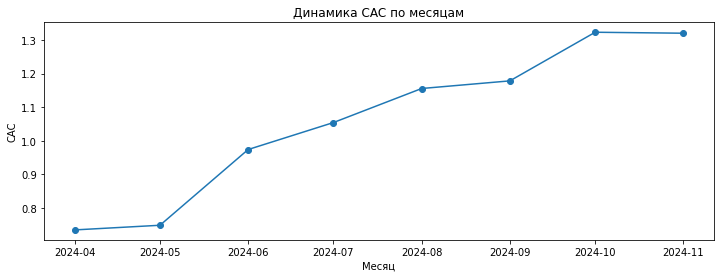

In [25]:
# Рассчитаем и визуализируем среднюю стоимость привлечения пользователя( САС) в разрезе месяца
cac_grouped = profiles.groupby('first_month')['CAC'].mean().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(cac_grouped['first_month'], cac_grouped['CAC'], marker='o')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.title('Динамика CAC по месяцам')
plt.show()


##### Средняя стоимость привлечения пользователя начинает активно расти с июня месяца

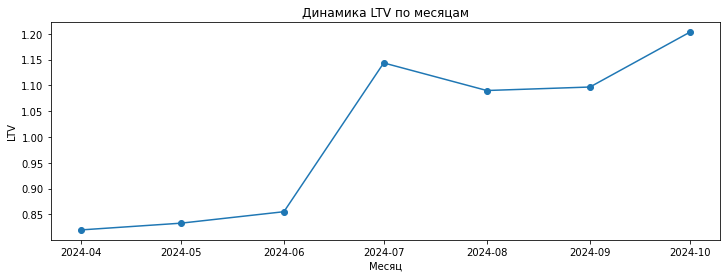

In [26]:
# Рассчитаем значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения
# При рассчёте месячной динамики исключим ноябрь месяц, так как не все пользователи в этот месяц будут иметь полный набор данных за 28 дней
# Рассчитаем и визуализируем LTV
orders_28_df['first_dt']=pd.to_datetime(orders_28_df['first_dt'])
orders_28_df['first_month']=orders_28_df['first_dt'].dt.to_period('M').dt.to_timestamp()

ltv_by_month = orders_28_df[orders_28_df['first_month']!='2024-11-01'].groupby('first_month').agg({'revenue': 'sum', 'user_id': 'nunique'}).reset_index()

ltv_by_month['ltv'] = ltv_by_month['revenue'] / ltv_by_month['user_id']
ltv_by_month = ltv_by_month[['first_month', 'ltv']]

plt.figure(figsize=(12, 4))
plt.plot(ltv_by_month['first_month'],ltv_by_month['ltv'], marker='o')
plt.title('Динамика LTV по месяцам')
plt.xlabel('Месяц')
plt.ylabel('LTV')
plt.show()

##### С июля  месяца показатель  LTV значительно вырос и продолжил положительную динамику.

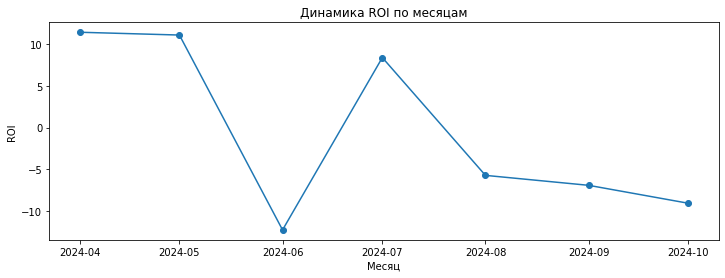

In [27]:
# Рассчитаем и визуализируем метрику ROI по месяцам

revenue_28 = orders_28_df.groupby('first_month')['revenue'].sum().reset_index()

total_cac_grouped = profiles.groupby('first_month')['CAC'].sum().reset_index()

roi_data = pd.merge(revenue_28, total_cac_grouped, on='first_month', how='inner')

roi_data['roi'] = ((roi_data['revenue'] - roi_data['CAC']) / roi_data['CAC']) * 100
roi_data=roi_data[roi_data['first_month']!='2024-11-01']
roi_data = roi_data[['first_month', 'roi']]

plt.figure(figsize=(12, 4))
plt.plot(roi_data['first_month'],roi_data['roi'], marker='o')
plt.title('Динамика ROI по месяцам')
plt.xlabel('Месяц')
plt.ylabel('ROI')
plt.show()

##### Метрика ROI сильно упала в июня месяце, восстановилась в июле и далее  продолжила нисходящую динамику. Показатель стал хуже после изменений в продукте.

#### При анализе месячной динамики основных метрик продукта было выявлено следующее:
- После появления нового контента в июне месяце метрики вовлечённости пользователей DAU, MAU и Stickiness стали показывать положительную динамику, что указывает на то, что пользователям интересен новый контент и они более активно пользуются приложением.
- Но вместе с тем с июня месяца стал расти показатель CAC средних расходов на привлечение пользователя.Показатель LTV также увеличился и стабилизировался на более высоком уровне. В свою очередь показатель окупаемости инвестиций ROI начал демонстрировать негативную динамику, что указывает об ухудшении окупаемости вложений.


## Анализ метрик в разрезе источника привлечения


**Задача 1**. Определим самые популярные источники привлечения:
- Посчитаем общее число привлечённых пользователей для каждого источника.
- Визуализируем динамику набора новых пользователей по дням в каждом источнике.
- Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучим динамику изменения метрик на 28-й день в разрезе источника. Проведём анализ с выделением недельных когорт по дате привлечения. Рассчитаем и визуализируем:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.



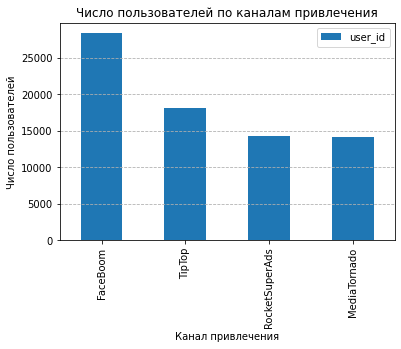

In [28]:
# Рассчитаем и визуализируем общее число привлечённых пользователей для каждого источника
channel_total=visits_df.groupby('first_channel')['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)

channel_total.plot.bar(x='first_channel',y='user_id')
plt.title('Число пользователей по каналам привлечения')
plt.xlabel('Канал привлечения')
plt.ylabel('Число пользователей')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Самое большое число новых пользователей пришло в приложение через канал FaceBoom 

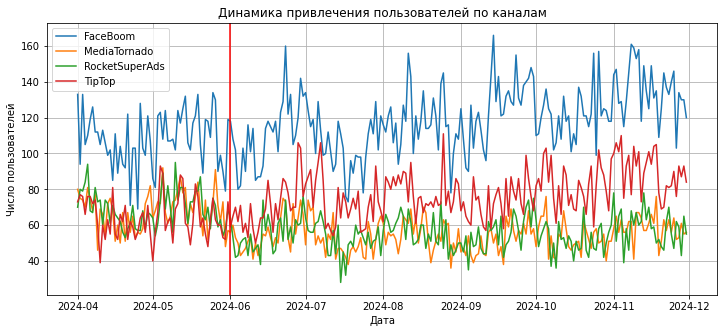

In [29]:
# Рассчитаем и визуализируем для каждого источника динамику набора новых пользователей
channel_users=visits_df.groupby(['first_dt','first_channel'])['user_id'].nunique().reset_index()

plt.figure(figsize=(12, 5))

for channel in channel_users['first_channel'].unique():
   df_plot = channel_users[channel_users['first_channel'] == channel]  
   plt.plot(df_plot['first_dt'], df_plot['user_id'], label=channel)

# Добавим заголовок и подписи осей
plt.title('Динамика привлечения пользователей по каналам')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.legend()
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='-')
plt.grid()
plt.show()

#### На графике заметна небольшая положительная дневная динамика привлечения новых пользователей по каналам FaceBoom и TipTop с июня месяца. Через эти каналы привлекается наибольшее число новых пользователей в каждую неделю.По каналам MediaTornado и RocketSuperAds наоборот заметно небольшое снижение показателя.

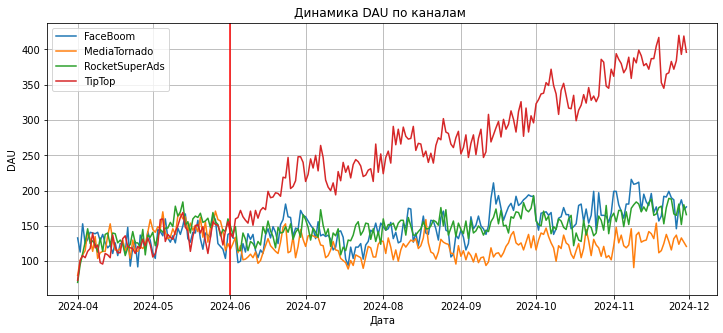

In [30]:
# Рассчитаем и визуализируем динамику DAU по каналам привлечения
dau_channel=visits_df.groupby(['session_start','first_channel'])['user_id'].nunique().reset_index()

plt.figure(figsize=(12,5))

for channel in channel_users['first_channel'].unique():
   df_plot = dau_channel[dau_channel['first_channel'] == channel]  
   plt.plot(df_plot['session_start'], df_plot['user_id'], label=channel)                               

plt.title('Динамика DAU по каналам ')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='-')
plt.legend()
plt.grid()
plt.show()

#### Канал TipTop показывает сильную положительную динамику по метрике DAU с июня месяца. Метрика DAU  остальных каналов стабильна.

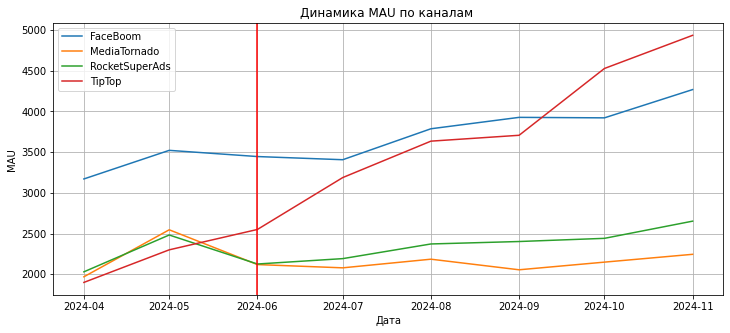

In [31]:
# Рассчитаем и визуализируем динамику MAU по каналам привлечения
mau_channel=visits_df.groupby(['first_channel','month'])['user_id'].nunique().reset_index()

plt.figure(figsize=(12,5))

for channel in channel_users['first_channel'].unique():
   df_plot = mau_channel[mau_channel['first_channel'] == channel]  
   plt.plot(df_plot['month'], df_plot['user_id'], label=channel)                               

plt.title('Динамика MAU по каналам ')
plt.xlabel('Дата')
plt.ylabel('MAU')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='-')
plt.legend()
plt.grid()
plt.show()


#### Метрика MAU показывает положительную динамику по каналам FaceBoom и TipTop. По двум другим каналам метрика стабильна.

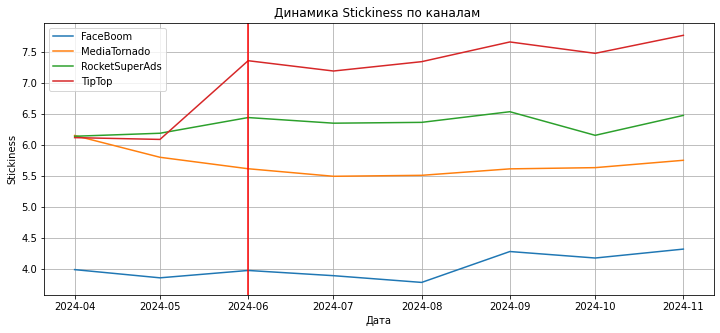

In [32]:
#### Рассчитаем и визуализируем динамику метрики вовлечённости Stickiness по каналам
dau_channel['session_start']=pd.to_datetime(dau_channel['session_start'])
dau_channel['month'] = dau_channel['session_start'].dt.to_period('M').dt.to_timestamp()
dau_channel_monthly_average = dau_channel.groupby(['first_channel','month'])['user_id'].mean().reset_index()
stickiness_table_channel = mau_channel.merge(dau_channel_monthly_average, on=['first_channel','month'], how='inner')
stickiness_table_channel['stick'] =100*(stickiness_table_channel['user_id_y']/stickiness_table_channel['user_id_x'])

plt.figure(figsize=(12,5))

for channel in stickiness_table_channel['first_channel'].unique():
   df_plot = stickiness_table_channel[stickiness_table_channel['first_channel'] == channel]  
   plt.plot(df_plot['month'], df_plot['stick'], label=channel)                               

plt.title('Динамика Stickiness по каналам ')
plt.xlabel('Дата')
plt.ylabel('Stickiness')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='-')
plt.legend()
plt.grid()
plt.show()

#### Самый низкий показатель метрики у канала FaceBoom, самый высокий у канала TipTop. С июня метрика stickiness показывает небольшую положительную динамику по каналам FaceBoom и TipTop. По двум другим каналам метрика стабильна. 

In [33]:
# Выделим недельные когорты по дате привлечения
orders_28_df['first_dt']=pd.to_datetime(orders_28_df['first_dt'])
orders_28_df['first_week'] = orders_28_df['first_dt'].dt.to_period('W').dt.to_timestamp()
orders_28_df.head()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime,first_month,first_week
0,26034876,NaT,0.00,2024-05-29,FaceBoom,0.0,2024-05-01,2024-05-27
1,69890364,NaT,0.00,2024-06-28,RocketSuperAds,0.0,2024-06-01,2024-06-24
2,75610104,NaT,0.00,2024-06-09,FaceBoom,0.0,2024-06-01,2024-06-03
3,76692397,NaT,0.00,2024-10-21,FaceBoom,0.0,2024-10-01,2024-10-21
4,80224421,2024-06-22,2.99,2024-06-21,FaceBoom,1.0,2024-06-01,2024-06-17


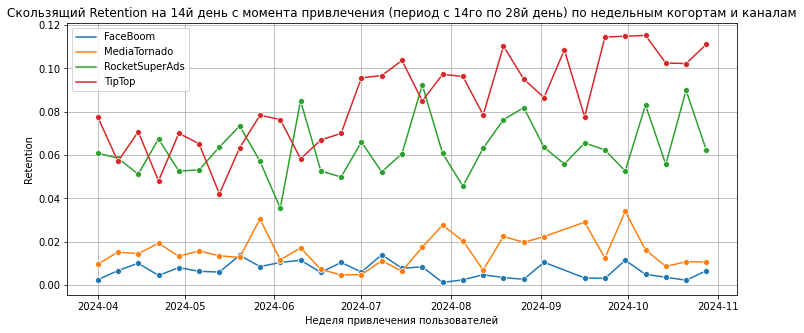

In [34]:
# Рассчитаем скользящее удержание пользователей за период с 14 по 28 день
def calculate_weekly_rolling_retention(df):
    # 1. Общее число пользователей в каждой недельной когорте и канале
    cohorts = df.groupby([
        'first_week',
        'first_channel'
    ])['user_id'].nunique().reset_index(name='total_users')
    
    
    # 2. Пользователи, заходившие в период 14–28 дней
    active_in_period = df[
        (df['lifetime'] >= 14) &
        (df['lifetime'] <= 28)
    ]
    returned = active_in_period.groupby([
        'first_week',
        'first_channel'
    ])['user_id'].nunique().reset_index(name='returned_users')
    
    
    # 3. Объединяем и считаем retention
    retention = pd.merge(
        cohorts,
        returned,
        on=['first_week', 'first_channel'],
        how='left'
    )
    retention['rolling_retention'] = retention['returned_users'] / retention['total_users']
    retention=retention[retention['first_week']<='2024-11-01']
    return retention

# Рассчитываем метрику
weekly_retention = calculate_weekly_rolling_retention(orders_28_df)

# Визуализируем метрику
plt.figure(figsize=(12,5))
sns.lineplot(
    data=weekly_retention,
    x='first_week',
    y='rolling_retention',
    hue='first_channel',
    marker='o',
)
plt.title('Скользящий Retention на 14й день с момента привлечения (период с 14го по 28й день) по недельным когортам и каналам')
plt.xlabel('Неделя привлечения пользователей')
plt.ylabel('Retention')
plt.legend()
plt.grid(True)
plt.show()

#### Показатель Retention недельных когорт самый низкий у каналов FaceBoom и MediaTornado. Начиная с июня месяца метрика немного выросла у канала TipTop, на остальных каналах привлечения метрика стабильна у всех недельных когорт.

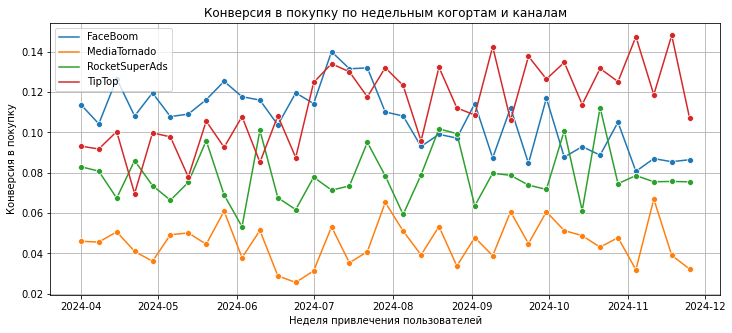

In [35]:
# Рассчитаем и визуализируем конверсию в покупку по недельным когортам
orders_28_df['revenue'] = orders_28_df['revenue'].fillna(0)

def calculate_weekly_conversion(df):
    # 1. Общее число пользователей в каждой недельной когорте и канале
    cohorts = df.groupby([
        'first_week',
        'first_channel'
    ])['user_id'].nunique().reset_index(name='total_users')
    
    
    # 2. Число платящих пользователей в каждой когорте и канале
    paying = df[df['revenue']>0].groupby([
        'first_week',
        'first_channel'
    ])['user_id'].nunique().reset_index(name='paying_users')
    
    
    # 3. Объединяем и считаем конверсию
    conversion = pd.merge(
        cohorts,
        paying,
        on=['first_week', 'first_channel'],
        how='left'
    )
    conversion['paying_users'] = conversion['paying_users'].fillna(0)
    
    conversion['conversion_rate'] = conversion['paying_users'] / conversion['total_users']
    
    return conversion

# Рассчитываем метрику
weekly_conversion = calculate_weekly_conversion(orders_28_df)

# Визуализируем конверсию в покупку

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=weekly_conversion,
    x='first_week',
    y='conversion_rate',
    hue='first_channel',
    marker='o',
)
plt.title('Конверсия в покупку по недельным когортам и каналам')
plt.xlabel('Неделя привлечения пользователей')
plt.ylabel('Конверсия в покупку')
plt.legend()
plt.grid(True)
plt.show()

#### Конверсия в покупку показывает положительную динамику у канала TipTop. У канала FaceBoom метрика снижается с августа месяца. У двух других каналов метрика стабильна.

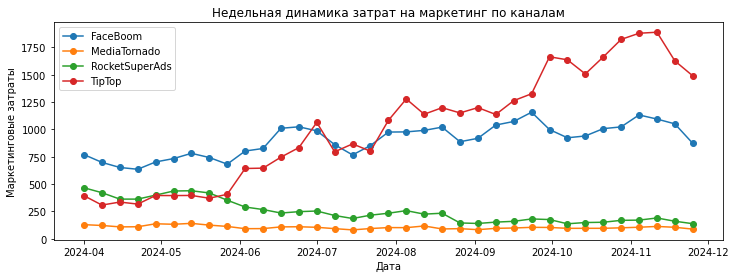

In [36]:
# Рассчитаем и визуализируем недельную динамику затрат на маркетинг по каналам привлечения
costs_df['dt']=pd.to_datetime(costs_df['dt'])
costs_df['week']=costs_df['dt'].dt.to_period('W').dt.to_timestamp()
week_marketing_costs=costs_df.groupby(['channel','week'])['costs'].sum().reset_index()

plt.figure(figsize=(12, 4))

for channel in week_marketing_costs['channel'].unique():
   df_plot = week_marketing_costs[week_marketing_costs['channel'] == channel]  
   plt.plot(df_plot['week'],df_plot['costs'], marker='o',label=channel)

plt.title('Недельная динамика затрат на маркетинг по каналам')
plt.xlabel('Дата')
plt.legend()
plt.ylabel('Маркетинговые затраты')
plt.show()

#### С июня месяца начали расти маркетинговые затраты по каналам FaceBoom и TipTop, по каналу TipTop очень сильный рост. По каналу RocketSuperAds затраты снизились и стабилизировались на этом уровне. По каналу MediaTornado показатель оставался стабильным.

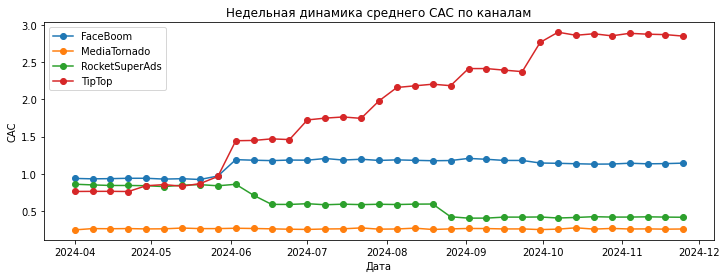

In [37]:
# Рассчитаем и визуализируем динамику среднего CAC по каналам
profiles['first_dt']=pd.to_datetime(profiles['first_dt'])
profiles['first_week']=profiles['first_dt'].dt.to_period('W').dt.to_timestamp()
cac_channel_mean=profiles.groupby(['first_channel','first_week'])['CAC'].mean().reset_index()

plt.figure(figsize=(12, 4))

for channel in cac_channel_mean['first_channel'].unique():
   df_plot = cac_channel_mean[cac_channel_mean['first_channel'] == channel]  
   plt.plot(df_plot['first_week'],df_plot['CAC'], marker='o',label=channel)

plt.title('Недельная динамика среднего CAC по каналам')
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.legend()
plt.show()

#### На графике с недельной динамикой среднего САС видно, что с июня месяца показатель  немного вырос по каналу FaceBoom, и сильно вырос по каналу TipTop. По каналу RocketSuperAds показатель снизился и с сентября стабилизировался на этом уровне. По каналу MediaTornado показатель оставался стабильным.

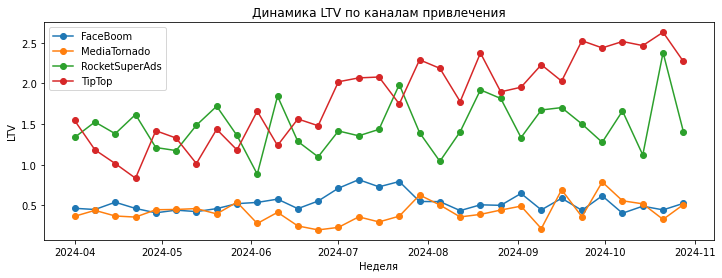

In [38]:
# Рассчитаем и визуализируем динамику значений LTV по каналам
# Отфильтруем недельные когорты по дате, так как пользователи недельных когорт ноября не имеют полный лайфтайм в 28 дней
# Рассчитаем и визуализируем LTV
ltv_channel_week = (orders_28_df[orders_28_df['first_week'] <= '2024-11-01'].groupby(['first_week','first_channel']).agg({'revenue': 'sum', 'user_id': 'nunique'}).reset_index())

ltv_channel_week['ltv'] = ltv_channel_week['revenue'] / ltv_channel_week['user_id']
ltv_channel_week = ltv_channel_week[['first_channel','first_week', 'ltv']]

plt.figure(figsize=(12, 4))

for channel in ltv_channel_week['first_channel'].unique():
   df_plot = ltv_channel_week[ltv_channel_week['first_channel'] == channel]  
   plt.plot(df_plot['first_week'],df_plot['ltv'], marker='o',label=channel)

plt.title('Динамика LTV по каналам привлечения')
plt.xlabel('Неделя')
plt.ylabel('LTV')
plt.legend()
plt.show()

#### Самые низкие показатели метрики у каналов FaceBoom и MediaTornado.Метрика LTV недельных когорт показывает положительную динамику у канала TipTop,у канала RocketSuperAds метрика изменчива, но средние показатели стабильны. На двух других каналах метрика в целом стабильна.

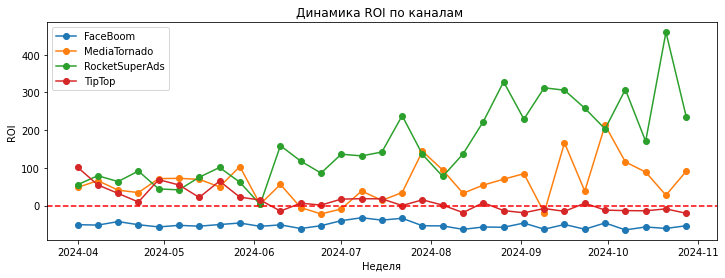

In [39]:
# Рассчитаем и визуализируем метрику ROI по месяцам

revenue_channel_total = orders_28_df.groupby(['first_channel','first_week'])['revenue'].sum().reset_index()

cac_channel_total = profiles.groupby(['first_channel','first_week'])['CAC'].sum().reset_index()

roi_data_channel = pd.merge(revenue_channel_total, cac_channel_total, on=['first_channel','first_week'], how='left')

roi_data_channel['roi'] = ((roi_data_channel['revenue'] - roi_data_channel['CAC']) / roi_data_channel['CAC']) * 100

roi_data_channel=roi_data_channel[roi_data_channel['first_week']<='2024-11-01']

roi_data_channel = roi_data_channel[['first_channel','first_week', 'roi']]

plt.figure(figsize=(12, 4))

for channel in roi_data_channel['first_channel'].unique():
   df_plot = roi_data_channel[roi_data_channel['first_channel'] == channel]  
   plt.plot(df_plot['first_week'],df_plot['roi'], marker='o',label=channel)

plt.title('Динамика ROI по каналам ')
plt.xlabel('Неделя')
plt.ylabel('ROI')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.show()

#### С июня месяца за 28 дней продолжили окупаться только маркетинговые затраты по каналам привлечения RocketSuperAds и MediaTornado. По каналу RocketSuperAds метрика выросла.  Показатель ROI  по каналу TipTop снизился и стал устойчиво отрицательным примерно с середины августа. По каналу FaceBoom показатель только отрицательный.

#### После анализа ключевых метрик в разрезе источника привлечения после запуска нового контента и корректировки маркетинговой стратегии было выявлено следующее:
- Канал FaceBoom привлёк больше всего новых пользователей, видна положительная динамика в показателях DAU и MAU, но при этом низкий показатель вовлечённости Stickiness. Выросли затраты на маркетинг при неизменном LTV. Показатель окупаемости остался отрицательным и даже немного снизился, как и конверсия в покупку. Канал привлекает много новых пользователей, но они не приносят доход и канал приносит убытки компании.
- По каналу TipTop улучшились метрики вовлеченности пользователей, канал привлекает много новых пользователей, которые часто возвращаются в продукт и совершают покупки, что видно из положительной динамики показателей Retention и конверсии в покупку. Также улучшился показатель LTV. Но это улучшение не смогло перекрыть сильное увеличение маркетинговых затрат, что привело к падению метрики окупаемости вложений ROI. Показатель  стал отрицательным.
- По каналу RocketSuperAds метрики вовлеченности пользователей оставались стабильными. Но за счёт снижения маркетинговых затрат на канал, при стабильном среднем показателе LTV, по каналу вырос показатель окупаемости ROI.
- По каналу MediaTornado все метрики были стабильны в рассматриваемом периоде.

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитаем и визуализируем в виде тепловой карты значения ROI за больший период равный 10 неделям.


#### За 28 дней не окупаются маркетинговые вложения в каналы TipTop и FaceBoom. Рассчитаем ROI по этим каналам за период 10 недель

In [40]:
# Округляем first_dt до начала недели (понедельник)
orders_df['first_dt']=pd.to_datetime(orders_df['first_dt'])
orders_df['first_week'] = orders_df['first_dt'].dt.to_period('W').dt.start_time
orders_df['first_dt']=orders_df['first_dt'].dt.date

In [41]:
# Рассчитываем номер недели с момента привлечения 
orders_df['N_week'] = (orders_df['event_dt'] - orders_df['first_dt']).dt.days / 7
orders_df['N_week']=orders_df['N_week'].fillna(0)
orders_df['N_week']=orders_df['N_week'].astype('int')
orders_df.head()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime,first_week,N_week
0,26034876,NaT,0.00,2024-05-29,FaceBoom,0.0,2024-05-27,0
1,69890364,NaT,0.00,2024-06-28,RocketSuperAds,0.0,2024-06-24,0
2,75610104,NaT,0.00,2024-06-09,FaceBoom,0.0,2024-06-03,0
3,76692397,NaT,0.00,2024-10-21,FaceBoom,0.0,2024-10-21,0
4,80224421,2024-06-22,2.99,2024-06-21,FaceBoom,1.0,2024-06-17,0


In [42]:
# Группируем по когорте, каналу и номеру недели и считаем LTV
week_revenue = orders_df[orders_df['N_week']<=9].groupby(['first_week','first_channel', 'N_week'])['revenue'].sum().reset_index()

In [43]:
# Считаем CAC для каждой когорты 
week_cac = costs_df.groupby(['channel','week'])['costs'].sum().reset_index()

In [44]:
# Объединяем LTV и CAC
week_data = pd.merge(week_revenue, week_cac, left_on=['first_week','first_channel'],right_on=['week','channel'], how='left')
week_data.head()

,first_week,first_channel,N_week,revenue,channel,week,costs
0,2024-04-01,FaceBoom,0,325.03,FaceBoom,2024-04-01,769.875901
1,2024-04-01,FaceBoom,1,49.35,FaceBoom,2024-04-01,769.875901
2,2024-04-01,FaceBoom,3,5.98,FaceBoom,2024-04-01,769.875901
3,2024-04-01,FaceBoom,5,2.99,FaceBoom,2024-04-01,769.875901
4,2024-04-01,MediaTornado,0,148.07,MediaTornado,2024-04-01,129.318322


In [45]:
# Сортируем по когорте, каналу и номеру недели
week_data = week_data.sort_values(['first_week','first_channel', 'N_week'])

In [46]:
# Рассчитываем накопленный доход по неделям для каждой когорты и канала привлечения
week_data['LTV'] = week_data.groupby(['first_week','first_channel'])['revenue'].transform(pd.Series.cumsum)
week_data.head()

,first_week,first_channel,N_week,revenue,channel,week,costs,LTV
0,2024-04-01,FaceBoom,0,325.03,FaceBoom,2024-04-01,769.875901,325.03
1,2024-04-01,FaceBoom,1,49.35,FaceBoom,2024-04-01,769.875901,374.38
2,2024-04-01,FaceBoom,3,5.98,FaceBoom,2024-04-01,769.875901,380.36
3,2024-04-01,FaceBoom,5,2.99,FaceBoom,2024-04-01,769.875901,383.35
4,2024-04-01,MediaTornado,0,148.07,MediaTornado,2024-04-01,129.318322,148.07


In [47]:
# Рассчитываем ROI
week_data['ROI'] =(week_data['LTV'] - week_data['costs']) / week_data['costs']*100

In [48]:
# Фильтруем таблицу по номеру недели меньшему или равному 10
roi_data=week_data[week_data['N_week']<=9].copy()
roi_data['N_week']=roi_data['N_week']+1

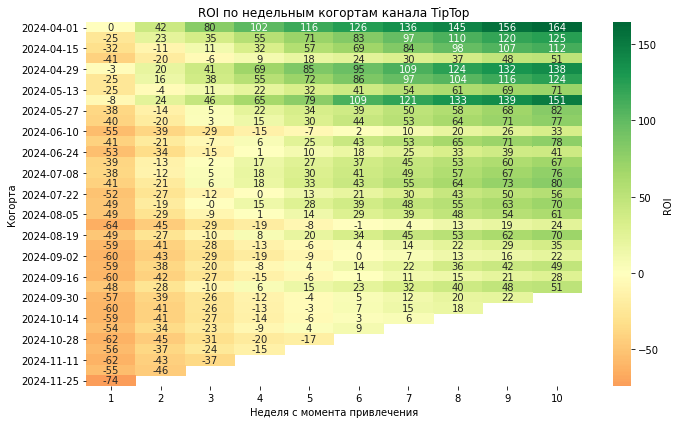

In [49]:
# Визуализируем ROI на тепловой карте для канала TipTop
roi_data_tip_top=roi_data[roi_data['first_channel']=='TipTop']
roi_pivot_tip_top = roi_data_tip_top.pivot_table(index='first_week', columns='N_week', values='ROI', aggfunc='mean')

roi_pivot_tip_top.index = roi_pivot_tip_top.index.date

plt.figure(figsize=(10, 6))
sns.heatmap(roi_pivot_tip_top, annot=True, fmt='.0f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'ROI'})
plt.title('ROI по недельным когортам канала TipTop')
plt.xlabel('Неделя с момента привлечения')
plt.ylabel('Когорта')
plt.tight_layout()
plt.show()

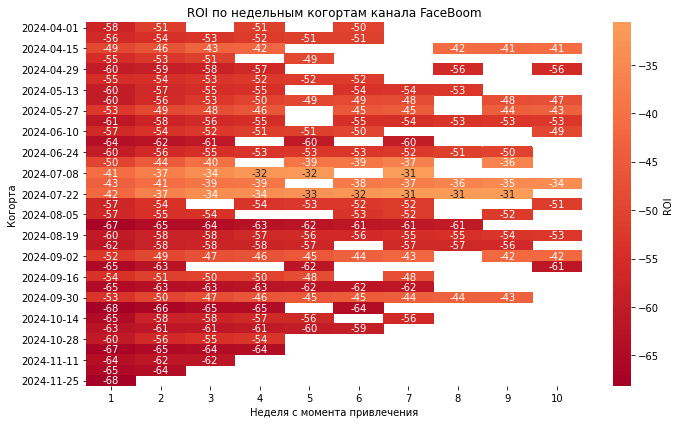

In [50]:
# Визуализируем ROI на тепловой карте для канала FaceBoom
roi_data_face_boom=roi_data[roi_data['first_channel']=='FaceBoom']
roi_pivot_face_boom = roi_data_face_boom.pivot_table(index='first_week', columns='N_week', values='ROI', aggfunc='mean')

roi_pivot_face_boom.index = roi_pivot_face_boom.index.date

plt.figure(figsize=(10, 6))
sns.heatmap(roi_pivot_face_boom, annot=True, fmt='.0f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'ROI'})
plt.title('ROI по недельным когортам канала FaceBoom')
plt.xlabel('Неделя с момента привлечения')
plt.ylabel('Когорта')
plt.tight_layout()
plt.show()

#### На тепловой карте по каналу TipTop видно снижение показателя окупаемости с июня месяца. До июня вложения начинали окупаться уже со второй недели, а после корректировки маркетинговых вложений срок начала окупаемости постепенно сместился с 3 недели на 5-6 недели и заметна негативная динамика. По каналу FaceBoom вложение не окупались ни до корректировки затрат, ни после неё.

## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


#### В июне мясяце в приложении был запущен новый спортивный контент и была скорректирована маркетинговая стратегия. По анализу показателей вовлечённости пользователей и юнит-экономики в разрезе каналов привлечения можно сделать следующие выводы:
- В целом по продукту общие показатели вовлечённости пользователей, такие как DAU,MAU и Stickiness выросли. Продукт стал пользоваться большим интересом у пользователей. При этом сильно выросли маркетинговые затраты на привлечение новых пользователей, что привело к увеличению дохода от них, что видно по общей метрике метрике LTV. Но рост затрат нивелировал рост LTV, что отразилось на показателе окупаемости ROI и привело к его снижению.
- Каналы FaceBoom и TipTop стали привлекатать больше новых пользователей, но качество пользователей различно. Пользователи, пришедшие через канал FaceBoom, не лояльны к продукту. Долго в продукте не задерживаются, мало совершают покупок и редко возвращаются. Маркетинговые вложения в этот канал не окпаеются и показатель ROI остаётся стабильно отрицательным даже в течении 10 недель после привлечения. По каналу TipTop аудитория более лояльная, пользователи часто возвращаются в продукт и совершают покупки, что видно из положительной динамики показателей Retention и конверсии в покупку. Также в этом канале улучшился показатель LTV. Но это улучшение не смогло перекрыть сильное увеличение маркетинговых затрат, что привело к падению метрики окупаемости вложений ROI в течении 28 дней. Показатель стал отрицательным.
- По каналу RocketSuperAds и MediaTornado метрики вовлеченности пользователей оставались стабильными. Но по каналу RocketSuperAds за счёт снижения маркетинговых затрат на канал, при стабильном среднем показателе LTV, вырос показатель окупаемости ROI в первые 28 дней.
- Вложения в канал привлечения FaceBoom совсем не окупаются и канал приносит убытки. Вложения в канал TipTop не окупаются за 28 дней. Каналы MediaTornado и RocketSuperAds окупаются и имеют лояльную аудиторию. Рекомендуется рассмотреть увеличение маркетинговых вложений в эти каналы привлечения.